In [215]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
l_arch = os.listdir('programas/data/wb')

In [3]:
l_df = []
for a in l_arch:
    l_df.append(pd.read_csv(os.path.join('programas','data','wb',a)))

In [4]:
df = pd.concat(l_df,ignore_index=True)

In [5]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [6]:
l = list(df['Indicator Code'].value_counts().index)

In [7]:
l_anios = [x for x in df.columns][4:]

In [8]:
l_base = [x for x in df.columns if x not in l_anios]

In [9]:
l_df = []
for a in l_anios:
    aux = df[l_base+[a]].rename(columns={a:'valor'})
    aux['year'] = a 
    l_df.append(aux)

In [10]:
df = pd.concat(l_df,ignore_index=True)

In [11]:
df.shape

(45144, 6)

In [12]:
df = df.pivot_table(index=['Country Name', 'Country Code','year'],
               columns='Indicator Code',
               aggfunc='max',
               values='valor').reset_index()

In [13]:
df['Country Name'].value_counts()

Kiribati                     57
South Africa                 57
Indonesia                    57
Greenland                    57
Rwanda                       57
                             ..
Fiji                         57
New Caledonia                57
Serbia                       30
West Bank and Gaza           27
Sint Maarten (Dutch part)    20
Name: Country Name, Length: 263, dtype: int64

In [14]:
for p in list(df['Country Name'].unique()):
    print('"%s",'%p)

"Afghanistan",
"Albania",
"Algeria",
"American Samoa",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Arab World",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas, The",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bermuda",
"Bhutan",
"Bolivia",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"British Virgin Islands",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Caribbean small states",
"Cayman Islands",
"Central African Republic",
"Central Europe and the Baltics",
"Chad",
"Channel Islands",
"Chile",
"China",
"Colombia",
"Comoros",
"Congo, Dem. Rep.",
"Congo, Rep.",
"Costa Rica",
"Cote d'Ivoire",
"Croatia",
"Cuba",
"Curacao",
"Cyprus",
"Czech Republic",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Early-demographic dividend",
"East Asia & Pacific",
"East Asia & Pacific (IDA & IBRD countries)",
"East Asia & Pacific (excluding high income)",
"Ecuado

In [15]:
l_fuera = ['Central Europe and the Baltics','Early-demographic dividend',
'East Asia & Pacific','East Asia & Pacific (IDA & IBRD countries)',
'East Asia & Pacific (excluding high income)',
'Europe & Central Asia',
'Europe & Central Asia (IDA & IBRD countries)',
'Europe & Central Asia (excluding high income)',
'European Union','Euro area','Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)','High income',
 'IBRD only',"Small states","South Asia",
"South Asia (IDA & IBRD)","Upper middle income",
'IDA & IBRD total',"Sub-Saharan Africa",
"Sub-Saharan Africa (IDA & IBRD countries)",
"Sub-Saharan Africa (excluding high income)",
'IDA blend',"West Bank and Gaza",
'IDA only',
'IDA total',"World",
 'Late-demographic dividend',
'Latin America & Caribbean',
'Latin America & Caribbean (excluding high income)',
'Latin America & the Caribbean (IDA & IBRD countries)',
'Least developed countries: UN classification',
 "Low & middle income",
"Low income",
"Lower middle income",
 "Middle East & North Africa",
"Middle East & North Africa (IDA & IBRD countries)",
"Middle East & North Africa (excluding high income)",
"Middle income","North America","OECD members","Other small states",
"Pacific island small states","Post-demographic dividend",
"Pre-demographic dividend",
]

In [16]:
df = df.loc[~df['Country Name'].isin(l_fuera)].reset_index(drop=True)

In [17]:
df.shape

(12362, 6)

In [18]:
df['Country Name'].value_counts()

Kiribati                     57
Palau                        57
Rwanda                       57
Uganda                       57
Myanmar                      57
                             ..
Fiji                         57
New Caledonia                57
Costa Rica                   57
Serbia                       30
Sint Maarten (Dutch part)    20
Name: Country Name, Length: 218, dtype: int64

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df['year'] = df['year'].astype(int)

In [21]:
l

['SP.POP.TOTL', 'SP.DYN.TFRT.IN', 'SP.DYN.LE00.IN']

In [22]:
ind = 'SP.POP.TOTL'

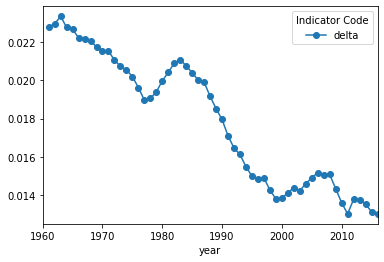

In [23]:
aux = df[['Country Code',ind,'year']].copy()

aux['year']+=1

aux = df.merge(aux,on=['Country Code','year'],how='left')

aux['delta'] = (aux['%s_x'%ind]-aux['%s_y'%ind])/aux['%s_x'%ind]

aux.head()

aux[['year','delta']][aux.year>=1960].groupby('year').mean().plot(marker='o')

In [24]:
t_des = 5
t_obs = 10

In [25]:
fhi=1960
fhf=2016
d = fhf-fhi +1

In [26]:
df.head()

Indicator Code,Country Name,Country Code,year,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.TOTL
0,Afghanistan,AFG,1960,32.292,7.45,8996351.0
1,Afghanistan,AFG,1961,32.742,7.45,9166764.0
2,Afghanistan,AFG,1962,33.185,7.45,9345868.0
3,Afghanistan,AFG,1963,33.624,7.45,9533954.0
4,Afghanistan,AFG,1964,34.060,7.45,9731361.0


In [162]:
aux = df[['Country Code','year']].copy()
for k in range(t_obs):
    #hacia atrás
    t = df[['Country Code','year']+l].copy()
    t['y0'] = t['year']+k
    t.drop('year',axis=1,inplace=True)
    aux = aux.merge(t,left_on=['Country Code','year'],right_on=['Country Code','y0'],how='left')
    aux.rename(columns=dict(zip(l,['%s_%d'%(v,k+1) for v in l])),inplace=True)
    aux.drop('y0',axis=1,inplace=True)
#hacia adelante
t = df[['Country Code','year','SP.DYN.LE00.IN']].copy()
t['y0'] = t['year']-t_des
t.drop('year',axis=1,inplace=True)
aux = aux.merge(t,left_on=['Country Code','year'],right_on=['Country Code','y0'],how='left')
aux.rename(columns={'SP.DYN.LE00.IN':'target'},inplace=True)
aux.drop('y0',axis=1,inplace=True)

In [163]:
for v in l:
    for k in range(2,12,2):
        aux['x_mean_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].mean(axis=1)
        aux['x_median_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].median(axis=1)
        aux['x_std_%s_%d'%(v,k)] = aux[['%s_%d'%(v,i) for i in range(1,k+1)]].std(axis=1)
        for i in range(k-1):
            aux['d_%d'%(i+1)] = (aux['%s_%d'%(v,i+1)]-aux['%s_%d'%(v,i+2)])/aux['%s_%d'%(v,i+2)]
        deltas = [c for c in aux.columns if c[:2]=='d_']
        aux['x_mean_delta_%s_%d'%(v,k)] = aux[deltas].mean(axis=1)
        aux.drop(deltas,axis=1,inplace=True)
        for i in range(k-1):
            aux['d_%d'%(i+1)] = (aux['%s_%d'%(v,i+1)]>aux['%s_%d'%(v,i+2)]).astype(int).astype(str)
        deltas = [c for c in aux.columns if c[:2]=='d_']
        aux['x_max_racha_crec_%s_%d'%(v,k)] = aux[deltas].sum(axis=1).astype(int).astype(str).map(lambda x:max([len(c) for c in x.split('0')]))
        aux.drop(deltas,axis=1,inplace=True)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [164]:
aux.sample(10)

Indicator Code,Country Code,year,SP.POP.TOTL_1,SP.DYN.TFRT.IN_1,SP.DYN.LE00.IN_1,SP.POP.TOTL_2,SP.DYN.TFRT.IN_2,SP.DYN.LE00.IN_2,SP.POP.TOTL_3,SP.DYN.TFRT.IN_3,...,x_mean_SP.DYN.LE00.IN_8,x_median_SP.DYN.LE00.IN_8,x_std_SP.DYN.LE00.IN_8,x_mean_delta_SP.DYN.LE00.IN_8,x_max_racha_crec_SP.DYN.LE00.IN_8,x_mean_SP.DYN.LE00.IN_10,x_median_SP.DYN.LE00.IN_10,x_std_SP.DYN.LE00.IN_10,x_mean_delta_SP.DYN.LE00.IN_10,x_max_racha_crec_SP.DYN.LE00.IN_10
3815,FRO,2013,48747.0,2.500,81.439024,48666.0,2.600,81.187805,48608.0,2.300,...,80.531707,80.512195,0.625867,0.003198,7,80.273659,80.287805,0.776426,0.003185,9
10119,ZAF,1997,43657024.0,2.973,59.580000,42898520.0,3.036,60.490000,42088165.0,3.110,...,61.462000,61.909000,0.971890,-0.005795,2,61.472100,61.745000,0.863725,-0.003114,4
905,BHR,2010,1240862.0,2.164,76.056000,1185029.0,2.197,75.913000,1114590.0,2.241,...,75.541750,75.551500,0.367800,0.002001,7,75.379100,75.402000,0.474063,0.002098,9
1990,KHM,2012,14776866.0,2.739,67.466000,14537886.0,2.805,67.034000,14308740.0,2.875,...,65.520750,65.700500,1.537157,0.009634,7,64.759300,65.043000,2.112890,0.010819,9
9784,SGP,1967,1977600.0,3.910,67.445732,1934400.0,4.460,67.255951,1886900.0,4.660,...,66.697223,66.805512,0.607965,0.003842,7,66.697223,66.805512,0.607965,0.003842,7
2331,TCD,2011,12288651.0,6.482,50.778000,11887202.0,6.592,50.233000,11502786.0,6.699,...,49.108000,48.955500,1.056823,0.008529,7,48.821800,48.539000,1.110435,0.007123,9
7558,MCO,1994,30427.0,NaN,NaN,30138.0,NaN,NaN,29863.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4428,GRC,1999,10761698.0,1.230,77.987805,10720509.0,1.240,77.839024,10661259.0,1.270,...,77.705793,77.662195,0.268875,0.001117,2,77.572195,77.612195,0.371110,0.001509,4
5525,ISR,2013,8059500.0,3.030,82.056098,7910500.0,3.050,81.704878,7765800.0,2.980,...,81.304268,81.503659,0.570167,0.002646,6,81.073171,81.178049,0.700150,0.002623,6
11452,TCA,1962,5763.0,NaN,NaN,5763.0,NaN,NaN,5726.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [165]:
aux.shape

(12362, 108)

In [166]:
varc = [c for c in aux.columns if c[:2]=='x_']

In [167]:
len(varc)

75

In [168]:
aux = aux[['Country Code','year','target']+varc]

In [169]:
aux = aux.loc[(aux.year>=1969)&(aux.year<=2011)&(~aux.target.isnull())].reset_index(drop=True)

In [171]:
aux.shape

(8524, 78)

In [172]:
aux.head()

Indicator Code,Country Code,year,target,x_mean_SP.POP.TOTL_2,x_median_SP.POP.TOTL_2,x_std_SP.POP.TOTL_2,x_mean_delta_SP.POP.TOTL_2,x_max_racha_crec_SP.POP.TOTL_2,x_mean_SP.POP.TOTL_4,x_median_SP.POP.TOTL_4,...,x_mean_SP.DYN.LE00.IN_8,x_median_SP.DYN.LE00.IN_8,x_std_SP.DYN.LE00.IN_8,x_mean_delta_SP.DYN.LE00.IN_8,x_max_racha_crec_SP.DYN.LE00.IN_8,x_mean_SP.DYN.LE00.IN_10,x_median_SP.DYN.LE00.IN_10,x_std_SP.DYN.LE00.IN_10,x_mean_delta_SP.DYN.LE00.IN_10,x_max_racha_crec_SP.DYN.LE00.IN_10
0,AFG,1969,38.540,10729387.0,10729387.0,176834.678053,0.023583,1,10495933.75,10488488.0,...,34.710375,34.7115,1.065501,0.012636,7,34.2717,34.2775,1.322696,0.012880,9
1,AFG,1970,39.039,10990275.5,10990275.5,192117.376914,0.025031,1,10739381.75,10729387.0,...,35.147000,35.1445,1.066817,0.012497,7,34.7103,34.7115,1.320484,0.012693,9
2,AFG,1971,39.556,11271974.0,11271974.0,206264.462286,0.026218,1,11000680.50,10990275.5,...,35.585000,35.5785,1.071499,0.012397,7,35.1489,35.1445,1.322475,0.012553,9
3,AFG,1972,40.092,11569882.5,11569882.5,215041.778761,0.026635,1,11280079.00,11271974.0,...,36.025875,36.0150,1.079959,0.012339,7,35.5891,35.5785,1.328747,0.012457,9
4,AFG,1973,40.650,11874881.0,11874881.0,216291.236443,0.026095,1,11573427.50,11569882.5,...,36.471000,36.4560,1.092633,0.012328,7,36.0323,36.0150,1.339562,0.012402,9


In [173]:
miss = 1-aux[varc].describe().T[['count']]/len(aux)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b65e09b0>,
      dtype=object)

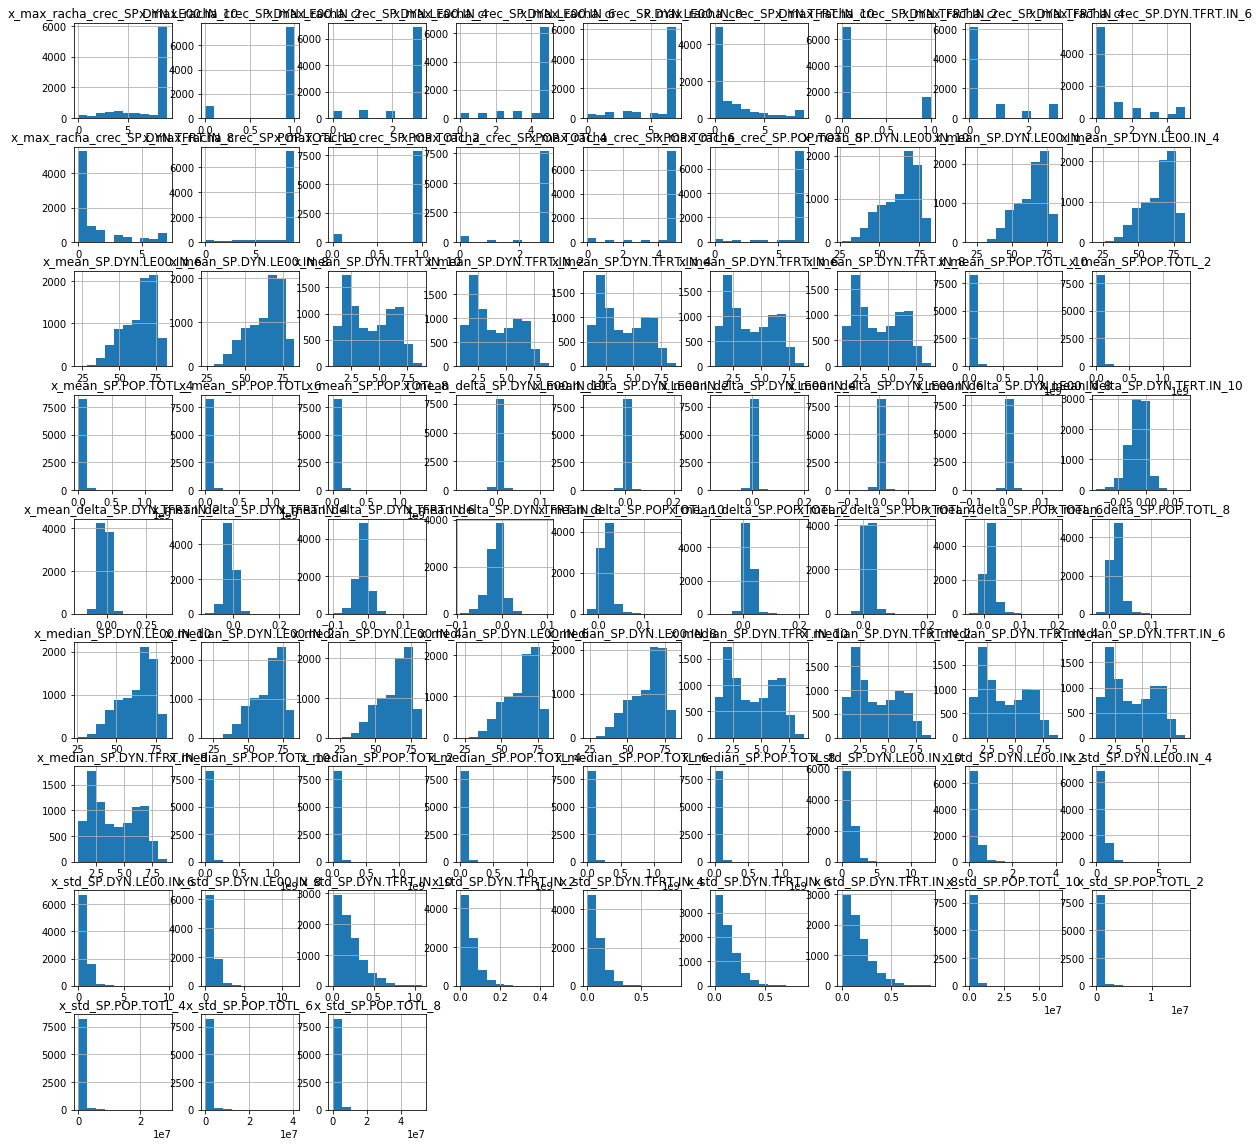

In [174]:
aux[varc].hist(figsize=(20,20))

In [175]:
from sklearn.impute import SimpleImputer

In [267]:
X = aux[varc].copy()
y = aux['target']

In [177]:
im = SimpleImputer(strategy='median')

In [178]:
im.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [179]:
Xc = pd.DataFrame(im.transform(X),columns=varc)

In [180]:
from scipy.stats import ks_2samp

In [181]:
l_ks = []
for v in varc:
    l_ks.append((v,ks_2samp(X[v].dropna(),Xc[v]).statistic))

In [182]:
ks = pd.DataFrame(l_ks,columns=['feature','ks'])

In [183]:
ks.sort_values('ks',ascending=False)

,feature,ks
43,x_mean_delta_SP.DYN.TFRT.IN_8,0.005572
38,x_mean_delta_SP.DYN.TFRT.IN_6,0.005572
33,x_mean_delta_SP.DYN.TFRT.IN_4,0.005572
28,x_mean_delta_SP.DYN.TFRT.IN_2,0.005572
48,x_mean_delta_SP.DYN.TFRT.IN_10,0.005572
...,...,...
49,x_max_racha_crec_SP.DYN.TFRT.IN_10,0.000000
24,x_max_racha_crec_SP.POP.TOTL_10,0.000000
29,x_max_racha_crec_SP.DYN.TFRT.IN_2,0.000000
34,x_max_racha_crec_SP.DYN.TFRT.IN_4,0.000000


In [184]:
from sklearn.linear_model import LinearRegression,PassiveAggressiveRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error

In [185]:
sc = MinMaxScaler()

In [186]:
Xs = pd.DataFrame(sc.fit_transform(Xc),columns=varc)

In [187]:
Xs.describe()

,x_mean_SP.POP.TOTL_2,x_median_SP.POP.TOTL_2,x_std_SP.POP.TOTL_2,x_mean_delta_SP.POP.TOTL_2,x_max_racha_crec_SP.POP.TOTL_2,x_mean_SP.POP.TOTL_4,x_median_SP.POP.TOTL_4,x_std_SP.POP.TOTL_4,x_mean_delta_SP.POP.TOTL_4,x_max_racha_crec_SP.POP.TOTL_4,...,x_mean_SP.DYN.LE00.IN_8,x_median_SP.DYN.LE00.IN_8,x_std_SP.DYN.LE00.IN_8,x_mean_delta_SP.DYN.LE00.IN_8,x_max_racha_crec_SP.DYN.LE00.IN_8,x_mean_SP.DYN.LE00.IN_10,x_median_SP.DYN.LE00.IN_10,x_std_SP.DYN.LE00.IN_10,x_mean_delta_SP.DYN.LE00.IN_10,x_max_racha_crec_SP.DYN.LE00.IN_10
count,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,...,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000,8524.000000
mean,0.020514,0.020514,0.019523,0.380854,0.922454,0.020288,0.020286,0.019925,0.303528,0.923979,...,0.674908,0.679729,0.078326,0.441773,0.844707,0.658819,0.662528,0.086950,0.438021,0.834689
std,0.079134,0.079134,0.072621,0.053696,0.267471,0.078388,0.078390,0.074637,0.060902,0.246441,...,0.186818,0.183619,0.060592,0.029739,0.285435,0.195701,0.192950,0.064859,0.033326,0.286063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000852,0.000852,0.000573,0.346273,1.000000,0.000836,0.000836,0.000612,0.263443,1.000000,...,0.537838,0.545056,0.042234,0.430404,0.857143,0.513912,0.520110,0.047855,0.424122,0.750000
50%,0.003812,0.003812,0.003067,0.379368,1.000000,0.003770,0.003771,0.003164,0.302090,1.000000,...,0.729036,0.732984,0.064355,0.437518,1.000000,0.714929,0.718183,0.072016,0.432694,1.000000
75%,0.011583,0.011583,0.013213,0.409018,1.000000,0.011427,0.011428,0.013263,0.335564,1.000000,...,0.816467,0.818576,0.100372,0.451962,1.000000,0.807707,0.809176,0.111841,0.450690,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
Xt,Xv,yt,yv = train_test_split(Xs,y,train_size=0.7)

Xt.shape,Xv.shape

modelo = LinearRegression()

modelo.fit(Xt,yt)

print(mean_absolute_error(y_pred=modelo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo.predict(Xv),y_true=yv))

0.6529164210776085
0.6603347330991409


In [196]:
param = dict(C=np.arange(0,1,0.01))

In [198]:
modelo_pa = PassiveAggressiveRegressor()

In [201]:
grid = GridSearchCV(param_grid=param,cv=3,estimator=modelo_pa,n_jobs=-1,
                    error_score='mean_absolute_error',verbose=True)

In [202]:
grid.fit(Xt,yt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.8s finished
/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='mean_absolute_error',
             estimator=PassiveAggressiveRegressor(C=1.0, average=False,
                                                  early_stopping=False,
                                                  epsilon=0.1,
                                                  fit_intercept=True,
                                                  loss='epsilon_insensitive',
                                                  max_iter=1000,
                                                  n_iter_no_change=5,
                                                  random_state=None,
                                                  shuffle=True, tol=0.001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gri...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.5

In [203]:
grid.best_score_

0.9780718872404918

In [204]:
grid.best_params_

{'C': 0.4}

In [205]:
modelo_pa = grid.best_estimator_

In [206]:
modelo_pa.fit(Xt,yt)

/home/jose/Documentos/unam/repos/amv_2020_2/lib64/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PassiveAggressiveRegressor(C=0.4, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [207]:
print(mean_absolute_error(y_pred=modelo_pa.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_pa.predict(Xv),y_true=yv))

0.9007533089515424
0.8850837306361193


In [212]:
aux.head()

Indicator Code,Country Code,year,target,x_mean_SP.POP.TOTL_2,x_median_SP.POP.TOTL_2,x_std_SP.POP.TOTL_2,x_mean_delta_SP.POP.TOTL_2,x_max_racha_crec_SP.POP.TOTL_2,x_mean_SP.POP.TOTL_4,x_median_SP.POP.TOTL_4,...,x_mean_SP.DYN.LE00.IN_8,x_median_SP.DYN.LE00.IN_8,x_std_SP.DYN.LE00.IN_8,x_mean_delta_SP.DYN.LE00.IN_8,x_max_racha_crec_SP.DYN.LE00.IN_8,x_mean_SP.DYN.LE00.IN_10,x_median_SP.DYN.LE00.IN_10,x_std_SP.DYN.LE00.IN_10,x_mean_delta_SP.DYN.LE00.IN_10,x_max_racha_crec_SP.DYN.LE00.IN_10
0,AFG,1969,38.540,10729387.0,10729387.0,176834.678053,0.023583,1,10495933.75,10488488.0,...,34.710375,34.7115,1.065501,0.012636,7,34.2717,34.2775,1.322696,0.012880,9
1,AFG,1970,39.039,10990275.5,10990275.5,192117.376914,0.025031,1,10739381.75,10729387.0,...,35.147000,35.1445,1.066817,0.012497,7,34.7103,34.7115,1.320484,0.012693,9
2,AFG,1971,39.556,11271974.0,11271974.0,206264.462286,0.026218,1,11000680.50,10990275.5,...,35.585000,35.5785,1.071499,0.012397,7,35.1489,35.1445,1.322475,0.012553,9
3,AFG,1972,40.092,11569882.5,11569882.5,215041.778761,0.026635,1,11280079.00,11271974.0,...,36.025875,36.0150,1.079959,0.012339,7,35.5891,35.5785,1.328747,0.012457,9
4,AFG,1973,40.650,11874881.0,11874881.0,216291.236443,0.026095,1,11573427.50,11569882.5,...,36.471000,36.4560,1.092633,0.012328,7,36.0323,36.0150,1.339562,0.012402,9


In [279]:
aux['y^'] = modelo.predict(Xs)

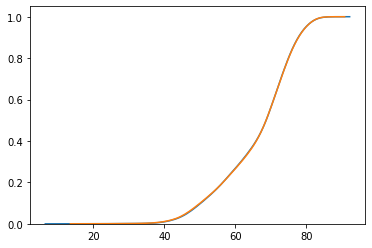

In [280]:
sns.distplot(aux[['y^']],hist=False,kde_kws={'cumulative':True})
sns.distplot(aux[['target']],hist=False,kde_kws={'cumulative':True})

In [281]:
aux[['target','y^']].sample(10)

Indicator Code,target,y^
5055,60.952000,60.848600
4400,67.804000,68.011394
1859,57.115000,54.265059
3996,64.560976,64.730747
889,48.442000,48.005893
5481,54.145000,57.217183
975,71.315000,71.201605
4402,68.115000,68.270800
3918,82.321951,83.348227
3288,62.498000,62.822757


In [282]:
from sklearn.feature_selection import SelectKBest

In [283]:
from sklearn.feature_selection import f_regression

In [284]:
sk = SelectKBest(f_regression,k=1) 
sk.fit(Xt,yt)
[a for a,b in zip(varc,sk.get_support()) if b]

['x_median_SP.DYN.LE00.IN_2']